# **REGRESION - PRECIO DEL DIAMANTE**

**Integrantes de equipo:**
* Julio César Choquehuayta Quenta  2018-119025
* Carlos Enrique Yufra Loza		     2019-119051
* Pablo Moisés Aro Galindo		     2019-119034
* Carlos Manuel Azañero Otoya	     2015-119026
* Jose Angel Castro Caceres		     2017-119054

## DESCRIPCION DEL PROBLEMA

Cada diamante tiene una combinación única de atributos, como el peso en quilates, el corte, el color, la claridad y las dimensiones físicas (longitud, anchura y profundidad). Estos atributos influyen en el valor del diamante, y los compradores y vendedores de diamantes necesitan una forma precisa de determinar su precio.

Los joyeros y minoristas necesitan conocer el precio de compra y venta de los diamantes para establecer márgenes de beneficio adecuados. Los compradores de diamantes buscan información sobre el valor de un diamante específico para asegurarse de que están obteniendo un precio justo.

Por lo que se aplicara regresion con redes neuoranles para solucionar dicho problema, usando el conjunto de datos "Diamonds Prices" que nos proporciona una muestra grande y diversa de diamantes con sus respectivos precios y atributos.

Link del Dataset: https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

## ANALISIS EXPLORATORIO

Primero, nosotros necesitamos tener la dataset descargada y almacenada en una carpeta en drive para su proximo uso, ademas de importar las librerias necesarias.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Cargamos la dataset
dataset_original = pd.read_csv('https://drive.google.com/uc?id=1f7l-r51EO6DhMbMotrijyke6xIty0AdX')
dataset_original

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


Exploramos un poco la dataset a usar, usando alguans sentencias para visualizar mejor las columnas, tipos de datos y otros.

In [ ]:
dataset_original.shape

(53943, 11)

In [ ]:
dataset_original.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
dataset_original.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
#Aplicamos un backup y eliminamos la columna innecesaria
dataset_copia = dataset_original.copy()
columns_to_drop = ['Unnamed: 0']
dataset_copia.drop(columns=columns_to_drop, inplace=True)

Convertimos los datos categoricos a numericos

In [ ]:
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2,'Premium':3,'Ideal':4}
color_mapping = {'D': 6, 'E': 5, 'F': 4,'G' : 3, 'H' : 2, 'I' : 1, 'J' : 0}
clarity_mapping = {'I1' : 0, 'SI2':1, 'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
dataset_copia['cut_numerica'] = dataset_copia['cut'].map(cut_mapping)
dataset_copia['color_numerica'] = dataset_copia['color'].map(color_mapping)
dataset_copia['clarity_numerica'] = dataset_copia['clarity'].map(clarity_mapping)

In [ ]:
print(dataset_copia)
print("Dimensiones del dataset_original:", dataset_original.shape)
print("Dimensiones del dataset_copia:", dataset_copia.shape)
print(dataset_copia.info())

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   
53940   0.71    Premium     E     SI1   60.5   55.0   2756  5.79  5.74  3.49   
53941   0.71    Premium     F     SI1   59.8   62.0   2756  5.74  5.73  3.43   
53942   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71  5.76  3.47   

       cut_numerica  color_numerica  cl

In [ ]:
columns_to_drop = ['cut','color','clarity']
dataset_copia.drop(columns=columns_to_drop, inplace=True)

In [ ]:
dataset_copia.sample(10)

,carat,depth,table,price,x,y,z,cut_numerica,color_numerica,clarity_numerica
8771,1.01,64.6,59.0,4468,6.23,6.30,4.05,1,6,1
26726,0.32,61.2,56.0,645,4.39,4.43,2.70,4,3,4
25837,1.71,59.1,58.0,14882,7.76,7.80,4.60,3,5,2
51612,0.73,62.1,58.0,2395,5.75,5.81,3.59,2,5,1
36359,0.40,62.2,55.0,939,4.72,4.76,2.95,4,1,5
7823,1.00,60.8,60.0,4295,6.45,6.41,3.91,3,6,1
34137,0.32,61.6,55.0,854,4.42,4.44,2.73,4,4,6
29111,0.34,63.2,55.0,689,4.50,4.46,2.83,2,2,3
35932,0.35,61.9,61.0,919,4.54,4.50,2.80,3,5,3
14920,1.50,64.9,58.0,6006,7.09,7.03,4.58,0,0,2


In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
train_dataset = dataset_copia.sample(frac=0.8, random_state=0)
test_dataset = dataset_copia.drop(train_dataset.index)

In [ ]:
# Separe la variable objetivo (precio) de las características
train_features = train_dataset.drop("price", axis=1)
train_labels = train_dataset["price"]
test_features = test_dataset.drop("price", axis=1)
test_labels = test_dataset["price"]

In [ ]:
train_features

,carat,depth,table,x,y,z,cut_numerica,color_numerica,clarity_numerica
34665,0.31,61.7,56.0,4.35,4.31,2.67,4,5,3
36941,0.34,60.6,58.0,4.55,4.57,2.76,2,4,1
14973,1.57,59.6,56.0,7.59,7.50,4.50,3,0,1
19891,1.20,62.3,56.0,6.77,6.82,4.23,4,3,4
41070,0.46,62.2,55.0,4.94,4.97,3.08,4,1,7
...,...,...,...,...,...,...,...,...,...
22623,1.63,62.6,53.0,7.55,7.49,4.71,4,3,1
11095,1.10,62.0,59.0,6.62,6.60,4.10,3,4,1
10092,0.90,63.6,55.0,6.15,6.12,3.90,1,4,2
26364,0.32,63.0,55.0,4.35,4.38,2.75,2,3,4


In [ ]:
# Normalizamos las caracteristicas
train_mean = train_features.mean()
train_std = train_features.std()
train_features = (train_features - train_mean) / train_std
test_features = (test_features - train_mean) / train_std

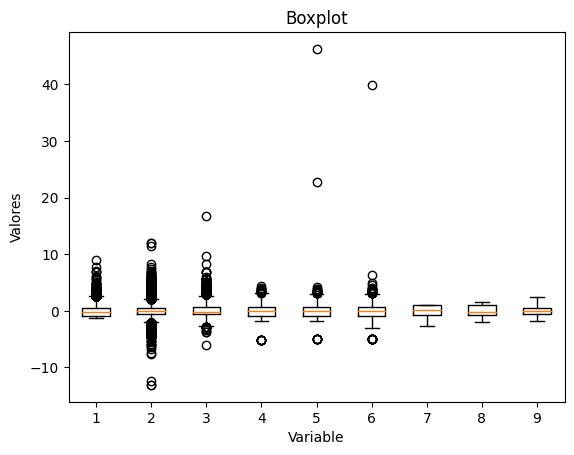

In [ ]:
# Crear el boxplot
plt.boxplot(train_features.values)

# Agregar etiquetas y título
plt.xlabel("Variable")
plt.ylabel("Valores")
plt.title("Boxplot")

# Mostrar el gráfico
plt.show()

In [ ]:
# Definimos el modelo de red neuronal
model = keras.Sequential([
    layers.Dense(1024, activation="relu", input_shape=[len(train_features.keys())]),
    layers.Dense(512, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              10240     
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 128)               65664     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 611,073
Trainable params: 611,073
Non-tr

In [ ]:
# Compilamos el modelo
model.compile(loss="mse", optimizer='adam', metrics=["mae", "mse"])

In [ ]:
# Entrenamos el modelo
history = model.fit(train_features, train_labels, epochs=50, validation_data=(test_features, test_labels))

Epoch 1/50
1349/1349 [==============================] - 25s 17ms/step - loss: 2223022.7500 - mae: 696.4622 - mse: 2223022.7500 - val_loss: 599604.9375 - val_mae: 424.6885 - val_mse: 599604.9375
Epoch 2/50
1349/1349 [==============================] - 23s 17ms/step - loss: 720341.0000 - mae: 418.4211 - mse: 720341.0000 - val_loss: 495932.5625 - val_mae: 380.1593 - val_mse: 495932.5625
Epoch 3/50
1349/1349 [==============================] - 23s 17ms/step - loss: 574371.8125 - mae: 387.6294 - mse: 574371.8125 - val_loss: 533415.6875 - val_mae: 392.3163 - val_mse: 533415.6875
Epoch 4/50
1349/1349 [==============================] - 24s 18ms/step - loss: 511529.0625 - mae: 372.7649 - mse: 511529.0625 - val_loss: 490058.7500 - val_mae: 354.8814 - val_mse: 490058.7500
Epoch 5/50
1349/1349 [==============================] - 22s 16ms/step - loss: 484186.2188 - mae: 365.9830 - mse: 484186.2188 - val_loss: 565692.2500 - val_mae: 428.2242 - val_mse: 565692.2500
Epoch 6/50
1349/1349 [================

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae, test_mse = model.evaluate(test_features, test_labels)

338/338 [==============================] - 1s 4ms/step - loss: 345592.5625 - mae: 323.8993 - mse: 345592.5625


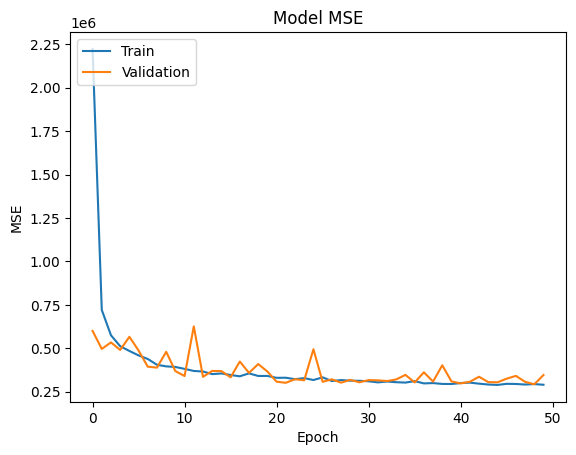

In [ ]:
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
# Make predictions on new data
new_data = np.array([[0.23,61.5,55,3.95,3.98,2.43,4,5,1]])
new_data = (new_data - train_mean.values.reshape(1, -1)) / train_std.values.reshape(1, -1)
prediction = model.predict(new_data)
print("Predicción del precio:", prediction[0][0])

1/1 [==============================] - 0s 25ms/step
Predicción del precio: 328.2354


338/338 [==============================] - 1s 4ms/step


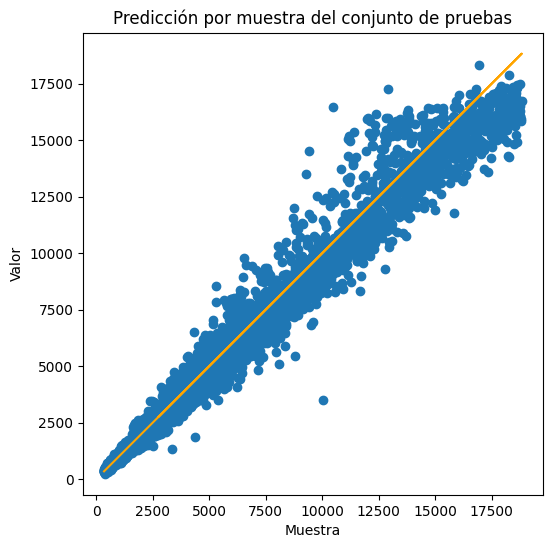

In [ ]:
predicciones = model.predict(test_features)
inicio = 50
fin=200
# Crear la gráfica de predicción por muestra
plt.figure(figsize=(10, 6))
a=plt.axes(aspect='equal')
plt.scatter(test_labels,predicciones)
plt.xlabel('Muestra')
plt.ylabel('Valor')
plt.title('Predicción por muestra del conjunto de pruebas')
_=plt.plot(test_labels,test_labels,color='orange')
plt.show()

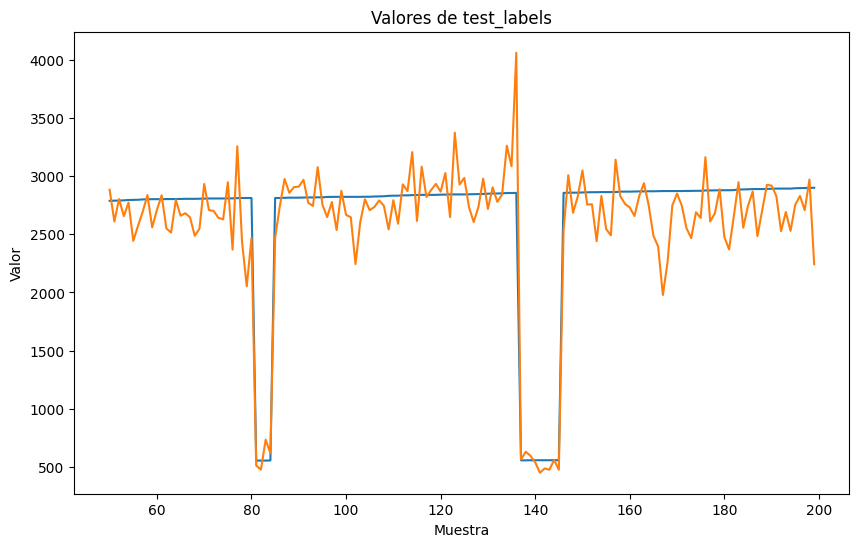

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(inicio,fin), test_labels[inicio:fin])
plt.plot(range(inicio,fin), predicciones[inicio:fin])
plt.xlabel('Muestra')
plt.ylabel('Valor')
plt.title('Valores de test_labels')
plt.show()

1349/1349 [==============================] - 6s 4ms/step


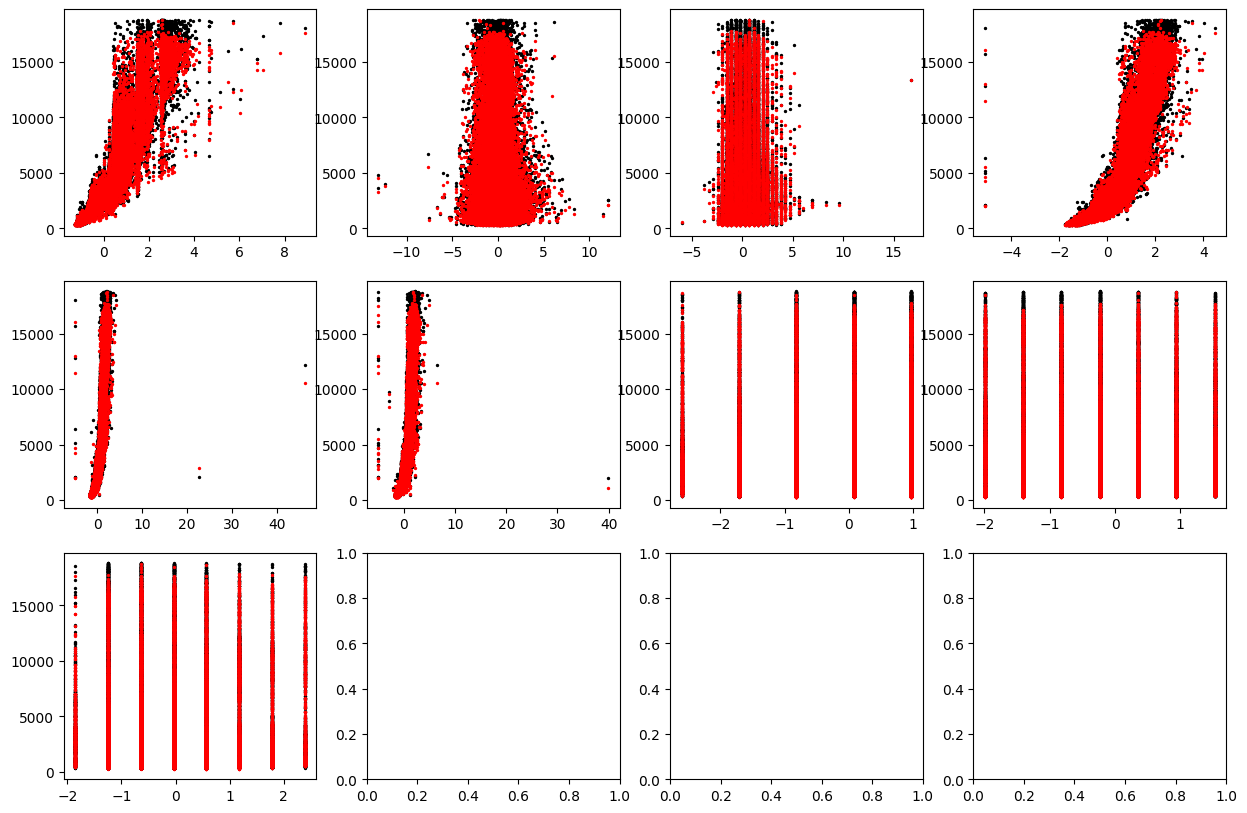

In [ ]:
# Plot each feature along with the predicted values
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs = axs.flatten()

for i, column in enumerate(train_features.columns):
    axs[i].scatter(train_features[column], train_labels, s=2, color='black')
    #axs[i].scatter(test_features[column], test_labels, s=2, color='red')
    axs[i].scatter(train_features[column], model.predict(train_features), s=2, color='red')
    #axs[i].plot(test_features[column], model.predict(test_features), linewidth=1)